Load necessary modules

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Generate artificial training data

In [2]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

Train the linear classifier (linear discriminant analysis)

In [3]:
lda = LinearDiscriminantAnalysis()
lda.fit(X[:,[0,1]], X[:,2])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Plot the linear predictor

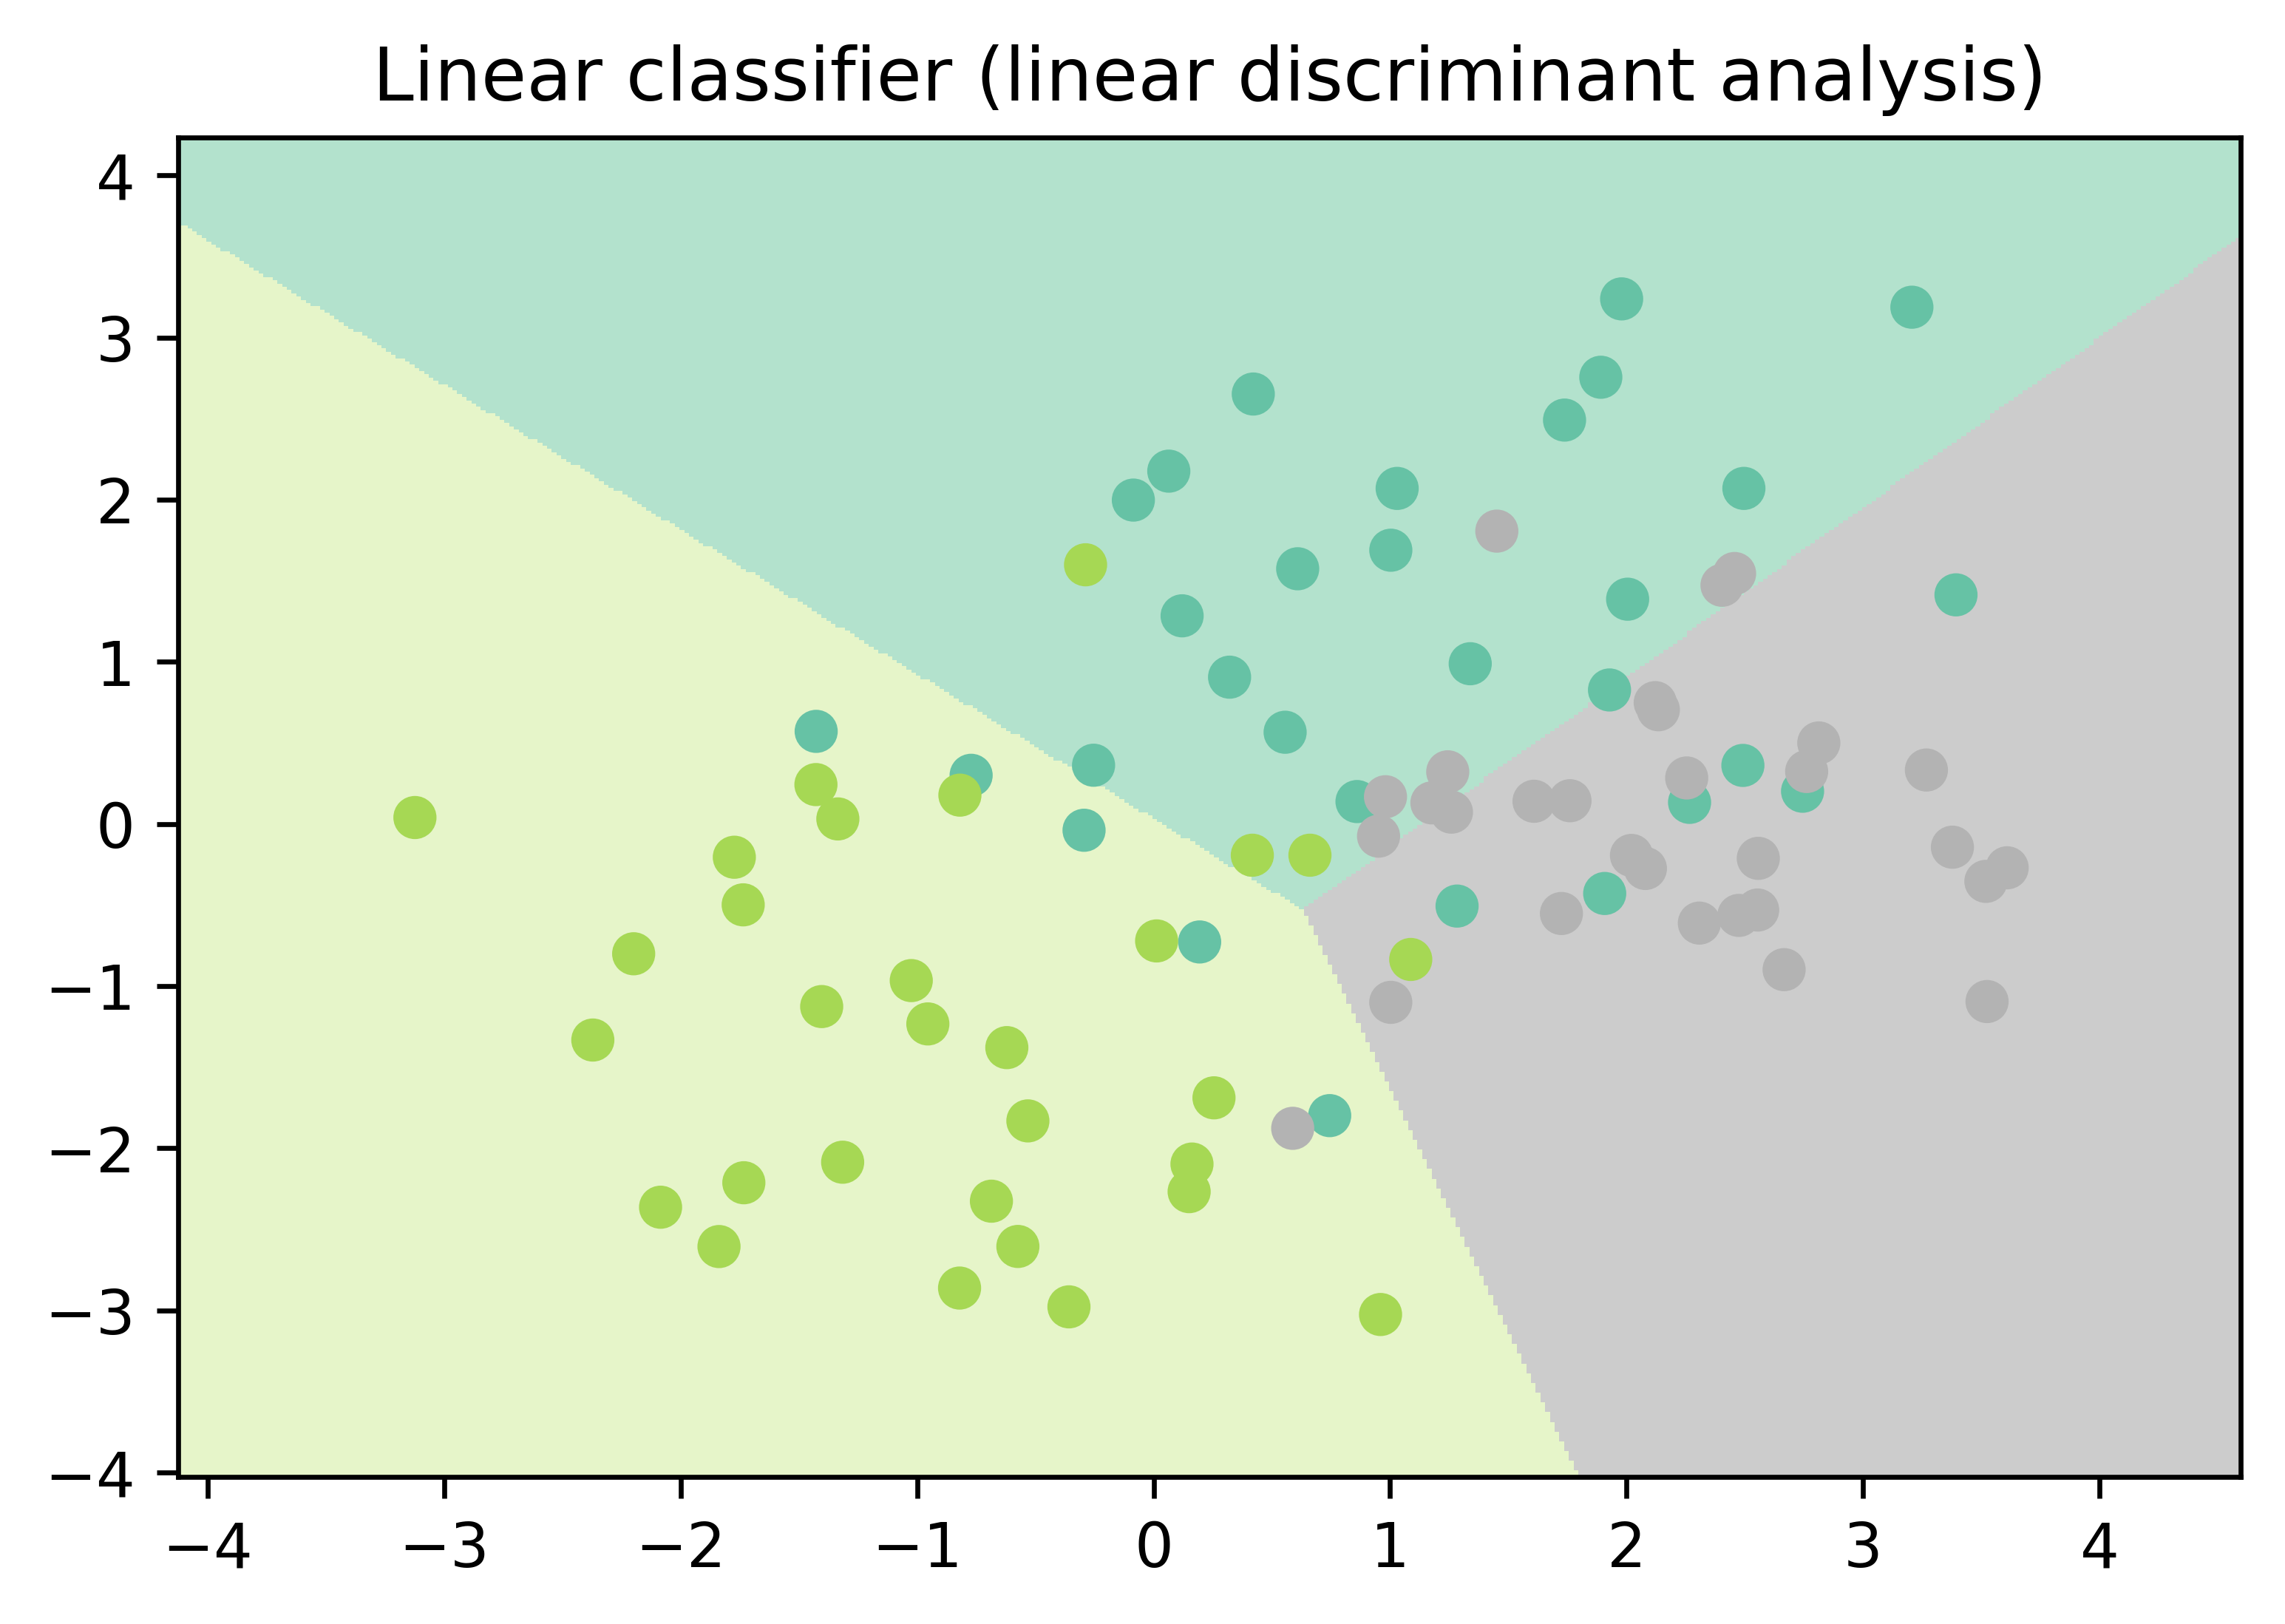

In [4]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=600)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
plt.title("Linear classifier (linear discriminant analysis)")
plt.show()

<Figure size 3600x2400 with 0 Axes>

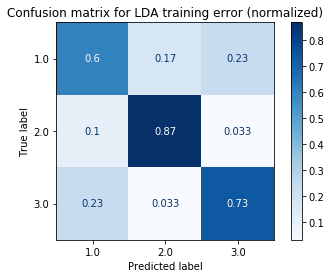

In [5]:
np.set_printoptions(precision=2)
plt.figure(dpi=600)
conf_matrix = plot_confusion_matrix(lda, X[:,[0,1]], X[:,2],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title("Confusion matrix for LDA training error (normalized)")
plt.show()

Train the non-linear classifier (kNN classification)

In [6]:
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X[:,[0,1]], X[:,2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Plot the non-linear predictor (kNN classification)

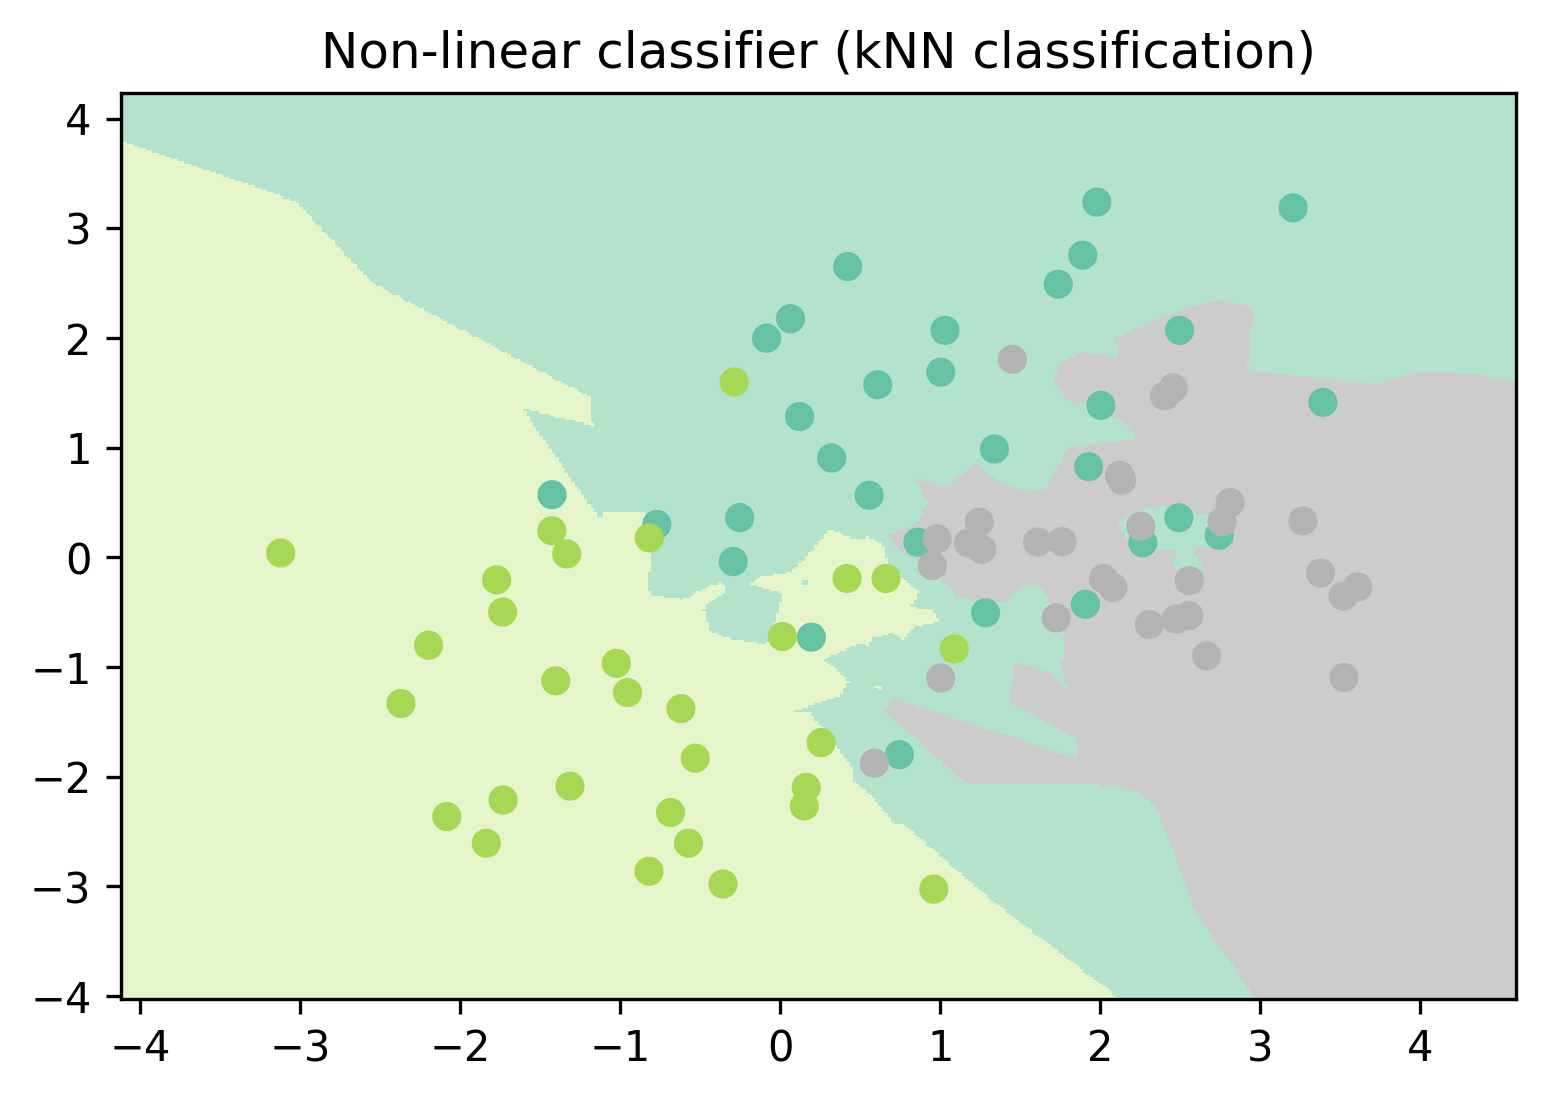

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap="Pastel2", shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap="Set2");
plt.title("Non-linear classifier (kNN classification)")
plt.show()

<Figure size 1800x1200 with 0 Axes>

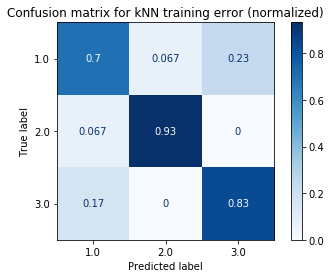

In [8]:
np.set_printoptions(precision=2)
plt.figure(dpi=300)
conf_matrix = plot_confusion_matrix(neigh, X[:,[0,1]], X[:,2],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title("Confusion matrix for kNN training error (normalized)")
plt.show()